In [4]:
%matplotlib inline

# Segment the tissue in TEMCA optical images

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import boto3
import skimage.io as io
from skimage import data
from skimage import feature
from skimage import color
from skimage import filters
from skimage import transform 
from skimage import draw
from skimage import measure
from scipy import ndimage as ndi
from toolbox.TAO.tao import TAO
from toolbox.TAO.taoDB import TAOdb

In [6]:
tao =  TAO()
taoDB = TAOdb()
url = taoDB.get_aperture_image_url('donaldtrump', 'test1', '000040')
im = io.imread(url)

In [12]:
# crop the image to the interesting part, convert to HSV
xoff = 700
imc = im[:, xoff:1300, :]
imhsv = color.rgb2hsv(imc)
imgray = color.rgb2gray(imc)

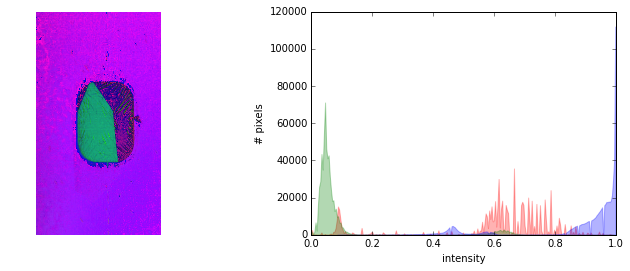

In [13]:
import skdemo
skdemo.imshow_with_histogram(imhsv);

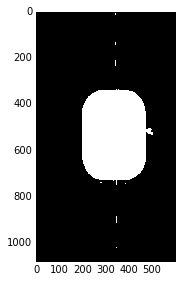

In [6]:
threshold = filters.threshold_otsu(imgray)
imb = imgray <= threshold
io.imshow(imb)

C:\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


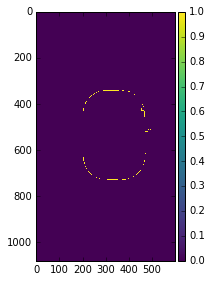

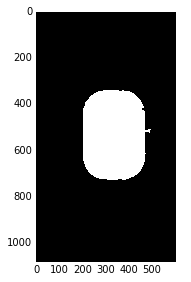

In [7]:
edges = feature.canny(imb)
io.imshow(edges)
io.show()
imf = ndi.binary_fill_holes(edges)
io.imshow(imf)
io.show()

In [34]:
imint = imf.astype(int)
imlabel = measure.label(imint, connectivity=1)
improps = measure.regionprops(imlabel)
region = improps[0]
region.centroid

for prop in region:
    print(prop, region[prop])

('area', 94535)
('bbox', (343L, 200L, 729L, 496L))
('centroid', (535.33402443539433, 334.24368752313956))
('convex_area', 97623)
('convex_image', array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool))
('coords', array([[343, 287],
       [343, 288],
       [343, 289],
       ..., 
       [728, 345],
       [728, 346],
       [728, 347]], dtype=int64))
('eccentricity', 0.7088770491587464)
('equivalent_diameter', 346.93760298004395)
('euler_number', 1L)
('extent', 0.82739637305699487)
('filled_area', 94535)
('filled_image', array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, Fals